In [37]:
!pip install xgboost

In [38]:
import pandas as pd

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [40]:
from xgboost import XGBClassifier

In [41]:
df = pd.read_csv('/content/breast-cancer.csv')

In [42]:
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  

In [43]:
if 'id' in df.columns:
    df = df.drop('id', axis=1)

In [44]:
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [45]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

In [48]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)

In [49]:
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:54:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [50]:
model_names = ['Random Forest', 'AdaBoost', 'XGBoost']
accuracy_scores = [rf_acc, ada_acc, xgb_acc]

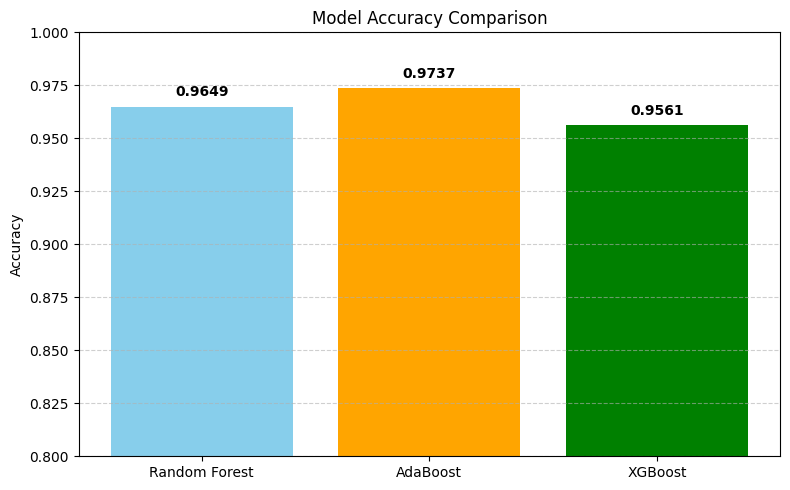

In [51]:
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracy_scores, color=['skyblue', 'orange', 'green'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.text(0, rf_acc + 0.005, f"{rf_acc:.4f}", ha='center', fontweight='bold')
plt.text(1, ada_acc + 0.005, f"{ada_acc:.4f}", ha='center', fontweight='bold')
plt.text(2, xgb_acc + 0.005, f"{xgb_acc:.4f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()